In [1]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [2]:
import numpy as np
import tensorflow as tf
import os

In [3]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

In [4]:
# Mecab 토크나이저와 불용어 정의
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [5]:
# def load_data(train_data, test_data, num_words=10000):
#     # 데이터 중복 제거 및 결측치 제거
#     train_data.drop_duplicates(subset=['document'], inplace=True)  # 훈련 데이터의 중복된 텍스트 제거
#     train_data = train_data.dropna(how='any')  # 훈련 데이터의 결측치 제거
#     test_data.drop_duplicates(subset=['document'], inplace=True)  # 테스트 데이터의 중복된 텍스트 제거
#     test_data = test_data.dropna(how='any')  # 테스트 데이터의 결측치 제거
    
#     # 훈련 데이터 토큰화 및 불용어 제거
#     X_train = []
#     for sentence in train_data['document']:
#         temp_X = tokenizer.morphs(sentence)  # 텍스트를 형태소 단위로 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
#         X_train.append(temp_X)
    
#     # 테스트 데이터 토큰화 및 불용어 제거
#     X_test = []
#     for sentence in test_data['document']:
#         temp_X = tokenizer.morphs(sentence)  # 텍스트를 형태소 단위로 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
#         X_test.append(temp_X)
    
#     # 단어 빈도수 계산 및 어휘 사전 생성
#     words = np.concatenate(X_train).tolist()  # 훈련 데이터의 모든 단어를 하나의 리스트로 결합
#     counter = Counter(words)  # 단어의 빈도수를 계산
#     counter = counter.most_common(num_words - 4)  # 상위 (num_words - 4)개의 단어 추출
#     # vocab = ['', '', '', ''] + [key for key, _ in counter]  # 어휘 사전 생성 (앞의 4개는 특수 토큰)
#     vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]  # 어휘 사전 생성 (앞의 4개는 특수 토큰)
#     word_to_index = {word: index for index, word in enumerate(vocab)}  # 단어를 인덱스로 매핑
    
#     # 단어 리스트를 인덱스 리스트로 변환하는 함수 정의
#     def wordlist_to_indexlist(wordlist):
#         # '<PAD>', '<BOS>', '<UNK>', '<UNUSED>' 특수 토큰 정의
#         return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
#     # 훈련 및 테스트 데이터를 인덱스 형태로 변환
#     X_train = list(map(wordlist_to_indexlist, X_train))
#     X_test = list(map(wordlist_to_indexlist, X_test))
    
#     return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

In [6]:
# def load_data(train_data, test_data, num_words=10000):
#     # 데이터 중복 제거 및 결측치 제거
#     train_data.drop_duplicates(subset=['document'], inplace=True)  # 훈련 데이터의 중복된 텍스트 제거
#     train_data = train_data.dropna(subset=['document'])  # 훈련 데이터의 결측치 제거
#     test_data.drop_duplicates(subset=['document'], inplace=True)  # 테스트 데이터의 중복된 텍스트 제거
#     test_data = test_data.dropna(subset=['document'])  # 테스트 데이터의 결측치 제거
    
#     # 훈련 데이터 토큰화 및 불용어 제거
#     X_train = []
#     for sentence in train_data['document']:
#         temp_X = tokenizer.morphs(sentence)  # 텍스트를 형태소 단위로 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
#         X_train.append(temp_X)
    
#     # 테스트 데이터 토큰화 및 불용어 제거
#     X_test = []
#     for sentence in test_data['document']:
#         temp_X = tokenizer.morphs(sentence)  # 텍스트를 형태소 단위로 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
#         X_test.append(temp_X)
    
#     # 단어 빈도수 계산 및 어휘 사전 생성
#     words = np.concatenate(X_train).tolist()  # 훈련 데이터의 모든 단어를 하나의 리스트로 결합
#     counter = Counter(words)  # 단어의 빈도수를 계산
#     counter = counter.most_common(num_words - 4)  # 상위 (num_words - 4)개의 단어 추출
#     vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]  # 어휘 사전 생성 (앞의 4개는 특수 토큰)
#     word_to_index = {word: index for index, word in enumerate(vocab)}  # 단어를 인덱스로 매핑
    
#     # 단어 리스트를 인덱스 리스트로 변환하는 함수 정의
#     def wordlist_to_indexlist(wordlist):
#         return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
#     # 훈련 및 테스트 데이터를 인덱스 형태로 변환
#     X_train = list(map(wordlist_to_indexlist, X_train))
#     X_test = list(map(wordlist_to_indexlist, X_test))
    
#     return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

In [7]:
# 중복 코드 제거를 위해 훈련 및 테스트 데이터 토큰화와 불용어 제거 작업을 함수로 정의
def tokenize_and_remove_stopwords(sentences, tokenizer, stopwords):
    processed_data = []
    for sentence in sentences:
        temp_X = tokenizer.morphs(sentence)  # 텍스트를 형태소 단위로 토큰화
        temp_X = [word for word in temp_X if word not in stopwords]  # 불용어 제거
        processed_data.append(temp_X)
    return processed_data

# 수정된 load_data 함수
def load_data(train_data, test_data, num_words=20000):
    # 데이터 중복 제거 및 결측치 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(subset=['document'])
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(subset=['document'])
    
    # 훈련 및 테스트 데이터 토큰화와 불용어 제거
    X_train = tokenize_and_remove_stopwords(train_data['document'], tokenizer, stopwords)
    X_test = tokenize_and_remove_stopwords(test_data['document'], tokenizer, stopwords)
    
    # 단어 빈도수 계산 및 어휘 사전 생성
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words - 4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word: index for index, word in enumerate(vocab)}
    
    # 단어 리스트를 인덱스 리스트로 변환하는 함수 정의
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    # 훈련 및 테스트 데이터를 인덱스 형태로 변환
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
    
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

In [8]:
# 데이터 로더 호출
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [9]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [10]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [11]:
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [12]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(146182, 41)


In [13]:
print(index_to_word[0])     # '<PAD>' 가 출력됩니다. 
print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(index_to_word[2])     # '<BOS>' 가 출력됩니다. 
print(index_to_word[3])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['영화'])
print(index_to_word[5])

<PAD>
<BOS>
<UNK>
<UNUSED>
5
영화


In [14]:
print(get_decoded_sentence(X_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

더 빙 . . 진짜 짜증 나 네요 목소리 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
라벨:  0


In [15]:
# 훈련 데이터셋 분리
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
print(f'Train data 크기: {len(X_train)}, Val data 크기: {len(X_val)}')

Train data 크기: 116945, Val data 크기: 29237


In [18]:
import matplotlib.pyplot as plt

In [19]:
# 학습 및 검증 손실, 정확도 시각화 함수 추가
def plot_training_history(history):
    # Training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    plt.show()

In [20]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
from keras.preprocessing.sequence import pad_sequences

In [21]:
# 한국어 Word2Vec 모델 로드
word2vec_file_path = os.getenv('HOME') + '/aiffel/sentiment_classification/data/word2vec_ko.model'
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv["끝"]

In [22]:
vector

array([ 1.038851  , -1.1634965 ,  2.2386286 ,  0.8971453 , -2.088168  ,
       -4.1942534 , -0.02519768, -0.69813883, -0.2908033 , -1.4651134 ,
       -2.6863668 ,  0.7999443 , -0.6957915 , -0.5018775 ,  3.5025773 ,
        0.21326113, -0.6588098 , -1.1900496 ,  0.61399573,  2.1247969 ,
        0.1549463 ,  3.0840218 ,  3.1680267 , -3.9143991 ,  3.6073153 ,
        0.5315545 , -0.3511633 , -1.107248  ,  1.7767181 , -0.95981866,
        2.6072454 , -0.00697957, -3.27628   ,  1.558644  ,  0.81922376,
        1.9231955 ,  3.7026553 , -0.53824735, -0.4920138 ,  2.4657123 ,
       -2.620749  , -0.08950733,  0.61453176,  1.8866426 ,  0.257866  ,
       -2.7827141 ,  2.9129577 , -0.6313133 ,  2.0387425 , -4.222685  ,
       -2.7560544 ,  1.7903243 , -1.3080189 , -2.5531402 , -0.43849912,
       -3.1073573 , -0.29090825,  5.1817617 ,  1.9604833 , -5.1421604 ,
       -0.71431434,  4.5624633 , -0.55525815, -3.3019137 ,  1.6761336 ,
       -1.9606539 , -0.2726863 ,  0.2465995 ,  1.2685091 ,  1.60

In [23]:
word_vectors.wv.similar_by_word("영화")

[('드라마', 0.8418774008750916),
 ('뮤지컬', 0.7775140404701233),
 ('코미디', 0.7489107251167297),
 ('다큐멘터리', 0.7401294708251953),
 ('헐리우드', 0.7397844195365906),
 ('애니메이션', 0.7170552015304565),
 ('독립영화', 0.7113528251647949),
 ('로맨틱', 0.7107657194137573),
 ('장편', 0.7101576924324036),
 ('극영화', 0.7045413255691528)]

In [24]:
word_vectors.wv.similar_by_word("축구")

[('아이스하키', 0.800794243812561),
 ('농구', 0.7926114201545715),
 ('배구', 0.7872303128242493),
 ('야구', 0.7543829679489136),
 ('축구팀', 0.7378026843070984),
 ('핸드볼', 0.733677327632904),
 ('풋살', 0.7298390865325928),
 ('필드하키', 0.6768761277198792),
 ('킥복싱', 0.668218195438385),
 ('테니스', 0.6668619513511658)]

In [25]:
word_vectors.wv.similar_by_word("극장")

[('공연장', 0.734738826751709),
 ('영화관', 0.7285679578781128),
 ('오페라단', 0.7239658832550049),
 ('오페라', 0.7214334607124329),
 ('소극장', 0.7028483152389526),
 ('콘서트홀', 0.6995508074760437),
 ('살롱', 0.6894219517707825),
 ('음악당', 0.6769198775291443),
 ('발레단', 0.6662783622741699),
 ('관현악단', 0.6594403982162476)]

In [26]:
# embedding_matrix = np.zeros((len(word_to_index), word_vectors.wv.vector_size))

# # embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
# for i in range(4,len(word_to_index)):
#     if index_to_word[i] in word_vectors.wv:
#         embedding_matrix[i] = word_vectors.wv[index_to_word[i]]

In [27]:
# 특수 토큰 임베딩 초기화 개선
embedding_matrix = np.zeros((len(word_to_index), word_vectors.vector_size))

for word, i in word_to_index.items():
    if word == '<PAD>':
        embedding_matrix[i] = np.zeros((word_vectors.vector_size,))
    elif word in word_vectors.wv:
        embedding_matrix[i] = word_vectors.wv[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(word_vectors.vector_size,))


In [28]:
print(f'word_to_index의 크기: {len(word_to_index)}')
print(f'word_vectors.vector_size: {word_vectors.wv.vector_size}')

word_to_index의 크기: 20000
word_vectors.vector_size: 100


In [29]:
print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (20000, 100)


In [30]:
sample_words = ['사랑', '축구', '영화', '배우']
for word in sample_words:
    if word in word_to_index:
        index = word_to_index[word]
        print(f"Word: {word}, Embedding vector: {embedding_matrix[index]}")
    else:
        print(f"Word: {word} is not in the vocabulary.")

Word: 사랑, Embedding vector: [ 3.25659418 -0.85421413 -3.69640112  1.09564686  0.59981501 -1.96814346
  0.32379073 -1.07160532 -1.17769372  2.04420471  2.25019145 -2.78680372
 -2.70235896 -0.97759151 -0.12478333  0.28235647  0.77683175 -1.53937471
  2.08790421 -5.44446182 -4.93141222  0.85320938  0.11118065 -2.74352193
  0.79023629  0.10469969 -0.56074625  1.66844213  1.02784193 -3.88168287
 -3.6068871  -3.12077093 -1.25273979 -0.77196646 -1.01029015  3.3316679
  0.30032924  1.20745111 -1.28136265  2.62812185 -1.46248233 -1.13548052
  0.76052392  2.83576989 -1.19935799  3.13472319  4.06202602 -0.23413125
  3.20585608 -0.95670539  0.77167803 -1.43001449  2.90140128 -3.94008708
 -3.23416901 -5.54606342  0.61850089 -0.75793767  2.10434914  2.35059905
  2.93132472 -2.23559308  3.20840359 -5.59463787  1.65166342 -0.32628602
 -1.88246834 -1.5573231  -1.84521627 -1.40443087  4.87256479 -2.10639286
 -0.32347348  1.99465513 -4.09679842 -1.45096552 -0.09111219 -4.45861721
  0.06598099 -2.21175408

In [31]:
print("Embedding matrix mean:", np.mean(embedding_matrix))
print("Embedding matrix std deviation:", np.std(embedding_matrix))

Embedding matrix mean: -0.014319176309392898
Embedding matrix std deviation: 1.291122059459831


In [32]:
special_tokens = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>']
for token in special_tokens:
    index = word_to_index[token]
    print(f"Token: {token}, Embedding vector: {embedding_matrix[index]}")

Token: <PAD>, Embedding vector: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Token: <BOS>, Embedding vector: [-0.07987886 -0.70870302  0.96841305  0.67442304 -0.16887759  0.07580417
 -0.56086896  0.97621905 -1.19365976  0.16631136 -0.63293943  0.30997533
 -0.74155798 -0.67391062 -1.43240653  1.19939005 -0.18256264 -0.78250406
  0.43389319 -1.23623832 -0.52790701 -0.21976841 -0.77837199 -0.63718782
  0.65698451 -0.4410614   1.55592351 -0.39799878 -0.60568455 -0.74389699
  0.54467554  0.48102971 -0.29598819 -0.08033461  0.6817663  -0.12834701
  0.74687708 -0.02332662 -0.03406228  0.60525112  0.21277698  0.33156064
  0.44637099  0.34729846 -0.25755165 -0.14340134  0.15796588  0.05585088
 -0.84483693 -0.049053   -0.00739858  0.115667

In [33]:
from tensorflow.keras.initializers import Constant

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, LayerNormalization, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [41]:
# Transformer Encoder Block 
# MultiHeadAttention 과 포지션-와이즈 피드포워드 네트워크로 구성
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, dense_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.dense_dim = dense_dim
        self.rate = rate
        
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(dense_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        # 객체를 직렬화하기 위해 필요한 구성 정보 반환
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
            "rate": self.rate
        })
        return config


In [42]:
vocab_size = len(word_to_index)
embed_dim = word_vectors.vector_size  # 임베딩 차원 수
num_heads = 2  # Multi-head attention에서의 헤드 수
dense_dim = 64  # Feed-forward network 은닉층 크기

In [43]:
inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embed_dim, 
                            embeddings_initializer=Constant(embedding_matrix), 
                            input_length=maxlen, trainable=True)
x = embedding_layer(inputs)

transformer_block = TransformerBlock(embed_dim, num_heads, dense_dim)
x = transformer_block(x)
x = TransformerBlock(embed_dim, num_heads, dense_dim)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.3)(x)  # Dropout 비율
output = Dense(1, activation="sigmoid")(x)

model_Transformer_Word2Vec = Model(inputs=inputs, outputs=output)

model_Transformer_Word2Vec.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 41)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 41, 100)           2000000   
_________________________________________________________________
transformer_block_2 (Transfo (None, 41, 100)           94064     
_________________________________________________________________
transformer_block_3 (Transfo (None, 41, 100)           94064     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101 

In [44]:
# 콜백 설정 - 가장 좋은 모델을 저장하도록 설정
Transformer_Word2Vec_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('Transformer_Word2Vec.keras', save_best_only=True)

# 모델 컴파일
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-4, 
                                                             decay_steps=10000, decay_rate=0.9)  # 초기 학습률 감소
model_Transformer_Word2Vec.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
# 모델 훈련
epochs = 50
Transformer_Word2Vec_history = model_Transformer_Word2Vec.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,  # 배치 크기 감소
                    validation_data=(X_val, y_val),
                    callbacks=[Transformer_Word2Vec_checkpoint_cb, tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                    verbose=1)

Epoch 1/50
914/914 [==============================] - 14s 14ms/step - loss: 0.5418 - accuracy: 0.7253 - val_loss: 0.4521 - val_accuracy: 0.7865
Epoch 2/50
914/914 [==============================] - 12s 14ms/step - loss: 0.4408 - accuracy: 0.7931 - val_loss: 0.4163 - val_accuracy: 0.8084
Epoch 3/50
914/914 [==============================] - 12s 14ms/step - loss: 0.4041 - accuracy: 0.8145 - val_loss: 0.3933 - val_accuracy: 0.8218
Epoch 4/50
914/914 [==============================] - 12s 14ms/step - loss: 0.3799 - accuracy: 0.8287 - val_loss: 0.3859 - val_accuracy: 0.8216
Epoch 5/50
914/914 [==============================] - 12s 14ms/step - loss: 0.3626 - accuracy: 0.8380 - val_loss: 0.3765 - val_accuracy: 0.8312
Epoch 6/50
914/914 [==============================] - 12s 14ms/step - loss: 0.3498 - accuracy: 0.8449 - val_loss: 0.3737 - val_accuracy: 0.8336
Epoch 7/50
914/914 [==============================] - 12s 14ms/step - loss: 0.3383 - accuracy: 0.8508 - val_loss: 0.3760 - val_accuracy:

In [45]:
# 저장된 가장 좋은 모델 로드
Transformer_Word2Vec_best_model = tf.keras.models.load_model('Transformer_Word2Vec.keras', 
                                                             custom_objects={'TransformerBlock': TransformerBlock})

# Transformer 모델 평가
Transformer_Word2Vec_results = Transformer_Word2Vec_best_model.evaluate(X_test, y_test, verbose=2)

print(Transformer_Word2Vec_results)

1537/1537 - 6s - loss: 0.3732 - accuracy: 0.8352
[0.3731715977191925, 0.8352015018463135]


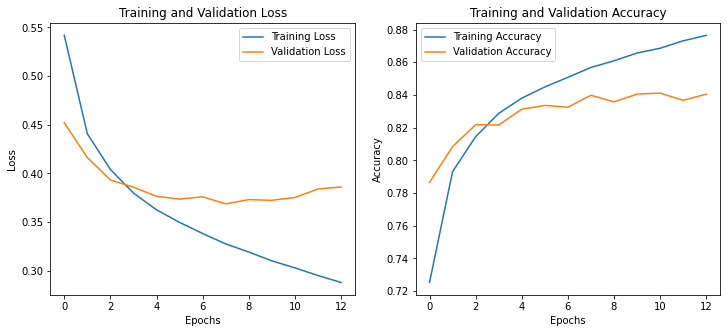

In [46]:
# Transformer 모델 시각화
plot_training_history(Transformer_Word2Vec_history)